<a href="https://colab.research.google.com/github/Srinidi-V/Machine-Learning-algorithms/blob/main/Iris_data_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Preparation**

In [ ]:
#Dataset of consideration
dataset = '/content/drive/My Drive/Iris.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv(dataset)
data = data.dropna()
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data = data[data.Species != "Iris-virginica"]
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
data1 = data

In [ ]:
test_data = data1['Species']
train_data = data1.drop('Species',axis=1)

print(train_data)

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0     1            5.1           3.5            1.4           0.2
1     2            4.9           3.0            1.4           0.2
2     3            4.7           3.2            1.3           0.2
3     4            4.6           3.1            1.5           0.2
4     5            5.0           3.6            1.4           0.2
..  ...            ...           ...            ...           ...
95   96            5.7           3.0            4.2           1.2
96   97            5.7           2.9            4.2           1.3
97   98            6.2           2.9            4.3           1.3
98   99            5.1           2.5            3.0           1.1
99  100            5.7           2.8            4.1           1.3

[100 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2, random_state = 42)

In [ ]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
55,56,5.7,2.8,4.5,1.3
88,89,5.6,3.0,4.1,1.3
26,27,5.0,3.4,1.6,0.4
42,43,4.4,3.2,1.3,0.2
69,70,5.6,2.5,3.9,1.1
...,...,...,...,...,...
60,61,5.0,2.0,3.5,1.0
71,72,6.1,2.8,4.0,1.3
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


# **Accuracy, Precision, Recall and F - Score**

In [ ]:
original_y_train = []
for i in y_train.values:
  original_y_train.append(i)

In [ ]:
y_test_labels = []
for i in y_test.values:
  y_test_labels.append(i)

In [ ]:
import numpy as np

# Initialising W values:
W = np.array([0.1,0.1,0.1,0.1,0.1])
W = W.reshape(1,5)
print(W)

[[0.1 0.1 0.1 0.1 0.1]]


In [ ]:
def SGD(eta,y,sig,W,x):
    W = W - eta*(y - sig)*x.transpose()
    return W

In [ ]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [ ]:
wt = []
sigmoid = np.vectorize(sigmoid)

In [ ]:
import math
for k in range(100):
  wrong_classifications = 0
  y_index = 0
  for i in x_train.values:
      temp = [1]
      temp.extend(i[1:len(i)])
      x_i = np.array([temp])
      x_i = x_i.reshape(5,1)
      wtx = np.dot(W,x_i)
      wt.append(wtx)
      sig = sigmoid(wtx)
      y_pred = (sig >= 0.5)
      if original_y_train[y_index] == 'Iris-setosa':
        y = 0
      else:
        y = 1
      y_index +=1
      if y_pred != y:
        W = SGD(0.1,y_pred,sig,W,x_i)
        wrong_classifications += 1
  print(wrong_classifications)
  if wrong_classifications == 0:
    print("Continuos right prediction! Model Converged!")
    break
    
print("Weights:",W)    

9
0
Continuos right prediction! Model Converged!
Weights: [[ 0.04580612 -0.08582584 -0.16591267  0.29799687  0.20116174]]


In [ ]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

In [ ]:
y_index = 0
for i in x_test.values:
  temp = [1]
  temp.extend(i[1:len(i)])
  x_i = np.array([temp])
  x_i = x_i.reshape(5,1)
  wtx = np.dot(W,x_i)
  sig = sigmoid(wtx)
  y_pred = (sig >= 0.5)
  if y_test_labels[y_index] == 'Iris-setosa':
    y = 0
  else:
    y = 1
  y_index += 1
  if y_pred == 1 and y == 1:
    true_positive = true_positive + 1
  elif y_pred == 0 and y == 0:
    true_negative = true_negative + 1
  elif y_pred == 0 and y == 1:
    false_negative = false_negative + 1
  else:
    false_positive = false_positive + 1

In [ ]:
confusion_matrix = np.array(
            [[true_positive, false_negative], [false_positive, true_negative]])

print(confusion_matrix)

[[ 8  0]
 [ 0 12]]


In [ ]:
accuracy = ( true_positive + true_negative ) / ( true_negative + true_positive + false_negative + false_positive )

print("Accuracy : ", accuracy)

Accuracy :  1.0


In [ ]:
if (true_positive + false_positive) == 0:
  print("Precision - positive : undefined")
else:
  precision_positive = true_positive / ( true_positive + false_positive )
  print("Precision - positive : ", precision_positive)

if (true_negative + false_negative) == 0:
  print("Precision - negative : undefined")
else:
  precision_negative = true_negative / ( true_negative + false_negative )
  print("Precision - negative : ", precision_negative)

Precision - positive :  1.0
Precision - negative :  1.0


In [ ]:
if (true_positive + false_negative) == 0:
  print("Recall - positive : undefined")
else:
  recall_positive = true_positive / ( true_positive + false_negative )
  print("Recall - positive : ", recall_positive)

if (false_positive + true_negative) == 0:
  print("Recall - negative : undefined")
else:
  recall_negative = true_negative / ( false_positive + true_negative )
  print("Recall - negative : ", recall_negative)

Recall - positive :  1.0
Recall - negative :  1.0


In [ ]:
f_score_positive = 2 * precision_positive * recall_positive / ( precision_positive + recall_positive )

print("F score positive : ", f_score_positive)

F score positive :  1.0


# **ROC Curve**

In [ ]:
Setosa = 0
Versicolor = 0

for i in data.values:
  if i[len(i)-1] == 'Iris-setosa':
    Setosa += 1
  else:
    Versicolor += 1

print("Count of Iris Setosa: ", Setosa)
print("Count of Iris Versi-color: ", Versicolor)

Count of Iris Setosa:  50
Count of Iris Versi-color:  50


In [ ]:
n = 1/Setosa    #Setosa - 0       Versicolor - 1
p = 1/Versicolor

plot_points = {}

tpr = []
fpr = []
wt = []

tpr_value = 0
fpr_value = 0

prob_values = []

In [ ]:
for i in data.values:
  temp = [1]
  temp.extend(i[1:len(i)-1])
  x_i = np.array([temp])
  x_i = x_i.reshape(5,1)
  wtx = np.dot(W,x_i)
  wt.append(wtx)
  sig = sigmoid(wtx)
  y_pred = (sig >= 0.5)
  prob_values.append(sig[0][0])

data['Probability'] = prob_values

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Probability
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.373982
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.397702
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.386780
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.407069
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.372109


In [ ]:
data = data.sort_values('Probability', ascending=False, axis=0)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Probability
83,84,6.0,2.7,5.1,1.6,Iris-versicolor,0.715964
72,73,6.3,2.5,4.9,1.5,Iris-versicolor,0.701039
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,0.691042
70,71,5.9,3.2,4.8,1.8,Iris-versicolor,0.690186
68,69,6.2,2.2,4.5,1.5,Iris-versicolor,0.688133
...,...,...,...,...,...,...,...
22,23,4.6,3.6,1.0,0.2,Iris-setosa,0.352504
32,33,5.2,4.1,1.5,0.1,Iris-setosa,0.351234
15,16,5.7,4.4,1.5,0.4,Iris-setosa,0.343901
33,34,5.5,4.2,1.4,0.2,Iris-setosa,0.339474


In [ ]:
for i in data.values:
  #print(i)
  threshold = i[6]

  y_pred = 1
  if i[5] == 'Iris-setosa':
    y = 0
  else:
    y = 1

  if y == y_pred:
    tpr_value += p
  else:
    fpr_value += n

  tpr.append(tpr_value)
  fpr.append(fpr_value)

plot_points['x'] = fpr
plot_points['y'] = tpr

plot_points

{'x': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.02,
  0.04,
  0.06,
  0.08,
  0.1,
  0.12000000000000001,
  0.14,
  0.16,
  0.18,
  0.19999999999999998,
  0.21999999999999997,
  0.23999999999999996,
  0.25999999999999995,
  0.27999999999999997,
  0.3,
  0.32,
  0.34,
  0.36000000000000004,
  0.38000000000000006,
  0.4000000000000001,
  0.4200000000000001,
  0.4400000000000001,
  0.46000000000000013,
  0.48000000000000015,
  0.5000000000000001,
  0.5200000000000001,
  0.5400000000000001,
  0.5600000000000002,
  0.5800000000000002,
  0.6000000000000002,
  0.6200000000000002,
  0.6400000000000002,
  0.6600000000000003,
  0.6800000000000003,
  0.7000000000000003,
  0.7200000000000003,
  0.7400000000000003,
  0.7600000000000003,
  0.7800000000000004,
  0.8000000000000004,
  0.8200000

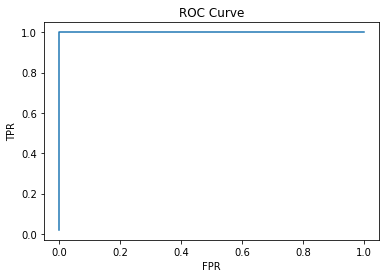

In [ ]:
import matplotlib.pyplot as plt

plt.plot(plot_points['x'], plot_points['y'])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

# **AUC** in this case is 1

This is an ideal case